In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import re
from sklearn import preprocessing

In [3]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #also known as bust
under_bust='Bust/Chest Circumference Under Bust (mm)'
# chest_italy='Chest Girth at Scye (Chest Circumference at Scye) (mm)'
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"


upper_chest='Chest Girth (Chest Circumference at Scye) (mm)'
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"

malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'

meausred_weight='Weight (kg)'
thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'


rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'
hourglass='Hourglass'
bottom_hourglass='Bottom Hourglass'
top_hourglass='Top hourglass'
apple='Apple'

In [4]:
demographic_path = "./dutch/demographic_metric.csv"
measurement_path = "./dutch/measurement_metric.csv"
extracted_path='./dutch/DutchExtracted.csv'

italy_extracted_path='./italy/ItalyExtracted.csv'
italy_demographic_path="./italy/ItalyDemographics_csv.csv"
italy_demographic_path="ItalyDemographics.csv"
italy_measurement_path="./italy/ItalyMeasurements_csv.csv"

In [5]:
def body_shape(bust,hip,waist,shoulder):
    bust=bust/25.4 #convert mm to inch
    hip=hip/25.4
    waist=waist/25.4
    shoulder=shoulder/25.4
    
    if (bust-hip)<= 1 and (hip-bust) <3.6 and (bust-waist)>=9 or (hip-waist)>=10:
        return hourglass
    elif (hip-bust)>1 and (bust-hip)<10 and (bust-waist)>=9:
        return top_hourglass
    elif (hip-bust)>=3.6 and (hip-waist)<9:
        return triangle
    elif (bust-hip)>=3.6 and (bust - waist)<9:
        return inverted_triangle
    elif  (hip-bust)<3.6 and (bust-hip) <3.6 and (bust-waist)<9 and (hip-waist)<10:
        return rectangle
    
    # else:
    #     return rectangle
    # # elif (bust-hip)>1 and (bust-hip)<10 and (bust-waist)>=9:
    # #     return top_hourglass
    # # elif (hip-waist)>=3.6 and (hip-bust)<10 and (hip-waist)>=9 and (hip/)
    # elif 
    # if (shoulder/hip) >=1.05 or (bust/hip)>=1.05:
        
    #     return inverted_triangle
    # elif (hip/shoulder) >=1.05 or (hip/shoulder)>1.05:
        
    #     return triangle
    # elif (waist/shoulder) >=0.75 or (waist/bust)>=0.75:
       
    #     return rectangle
    # elif (waist/shoulder)<=0.75 or (waist/bust) <=0.75 and (waist/hip)<=0.75:
        
    #     return hourglass
    # else:
        
    #     return apple
    # elif (waist/shoulder) >=1.05 and (waist/bust)>=1.05:
    #     return apple
    

In [6]:
# print(body_shape(1000,1000,600,1000))

In [7]:
demographic=[subject_number,gender,age, height, weight, shoe_size]
extracted=[subject_number,malleolus_height_inner,malleolus_height_outer]
mearuments=[subject_number,waist,chest,under_bust,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,upper_chest,meausred_weight]
italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy]
italy_measurements=[subject_number,waist,chest,under_bust,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,italy_upper_chest,meausred_weight]
additional=[subject_number]
feature_size=len(extracted)+len(mearuments)-2
#M_data=pd.read_csv(measurement_path,skipinitialspace=True)

In [8]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
measurement_data=measurement_data[mearuments]
demographic_data=demographic_data.loc[demographic_data[gender]=='Female'] #shape  Male (567,6) Female (700,6)

data = demographic_data.merge(measurement_data, on=subject_number, how='left') #shape (567, *)

# data = data.drop(subject_number, axis=1)

dutch_extracted=pd.read_csv(extracted_path,skipinitialspace=True,usecols=extracted)

data=data.merge(dutch_extracted,on=subject_number,how='left')
data=data.drop(gender,axis=1)
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,11001,39,173.00,60.00,37,724.0,904.0,793.0,444.0,1000.0,799.0,565.0,406.0,1053.0,603.0,844.0,60.9,69.63,88.96
1,11002,31,168.00,62.00,39,690.0,859.0,751.0,401.0,1027.0,754.0,607.0,429.0,1004.0,566.0,870.0,63.2,NaN,NaN
2,11009,44,165.00,87.00,38.5,1014.0,1092.0,921.0,452.0,1135.0,739.0,654.0,460.0,1014.0,573.0,1011.0,85.0,66.33,88.43
3,11017,33,160.00,58.00,37,755.0,898.0,785.0,438.0,985.0,808.0,579.0,432.0,1014.0,568.0,891.0,61.3,69.68,80.97
4,11021,25,177.00,63.00,39,901.0,925.0,766.0,416.0,1052.0,865.0,596.0,388.0,1054.0,625.0,857.0,66.0,66.94,88.28


In [9]:
print(data.shape)
print(feature_size)

(700, 19)
14


In [10]:
data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
data=data[data[height].str.contains("No Response")==False]
data = data[data[weight].str.contains("No Response") == False]
data = data[data[shoe_size].str.contains("No Response") == False]

total_features=data.shape[1]-1

data[height] = pd.to_numeric(data[height])
data[weight]=pd.to_numeric(data[weight])
data[shoe_size]=pd.to_numeric(data[shoe_size])
features = data.columns.tolist()



In [11]:
print(data.shape)

(583, 19)


In [12]:

italy_demographic_data=pd.read_csv(italy_demographic_path,skipinitialspace=True,usecols=italy_demographic)
italy_measurement_data=pd.read_csv(italy_measurement_path,skipinitialspace=True,usecols=italy_measurements)
italy_measurement_data.rename(columns = {italy_upper_chest:upper_chest}, inplace = True)
italy_measurement_data=italy_measurement_data[mearuments]
italy_demographic_data=italy_demographic_data.loc[italy_demographic_data[gender]=='Female'] 

italy_demographic_data.columns=[subject_number,age,gender,height,weight,shoe_size]
italy_data=italy_demographic_data.merge(italy_measurement_data,on=subject_number,how='left')
italy_extracted=pd.read_csv(italy_extracted_path,skipinitialspace=True,usecols=extracted)

italy_data=italy_data.merge(italy_extracted,on=subject_number,how='left')
#italy_data=italy_data.drop(subject_number,axis=1)
italy_data=italy_data.drop(gender,axis=1)
# italy_data.rename(columns={chest_italy:chest}, inplace=True)
italy_data.head()



,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,4002,21.2,176.0,70.0,40.0,752.0,988.0,770.0,473.0,1048.0,838.0,608.0,431.0,1056.0,625.0,908.0,71.3,56.0,66.0
1,4003,57.9,166.0,60.0,38.0,759.0,965.0,781.0,481.0,1001.0,764.0,570.0,432.0,1003.0,583.0,914.0,61.7,58.0,72.0
2,4005,18.1,170.0,55.0,40.0,792.0,849.0,730.0,436.0,974.0,800.0,512.0,384.0,961.0,629.0,823.0,56.0,62.0,70.0
3,4006,26.0,165.0,51.0,37.5,716.0,851.0,714.0,439.0,930.0,798.0,529.0,378.0,983.0,613.0,838.0,52.0,70.0,70.0
4,4008,41.1,157.0,52.0,36.0,643.0,870.0,711.0,440.0,998.0,717.0,555.0,384.0,967.0,544.0,805.0,54.3,56.0,70.0


In [13]:
print(italy_data.shape)
italy_data=italy_data[italy_data[shoe_size].str.contains("44 or Larger|35 or Smaller")==False]
# italy_data=italy_data[italy_data[pants_size].str.contains("Don't Know|29.5 or Smaller|63 or Larger")==False]
italy_data = italy_data[italy_data[shoe_size].str.contains("Don't Know") == False]
italy_data.dropna(axis=0,how='any',inplace=True)
italy_data[shoe_size]=pd.to_numeric(italy_data[shoe_size])
# italy_data[pants_size]=pd.to_numeric(italy_data[pants_size])
italy_data.head()
print(italy_data.shape)

(388, 19)
(373, 19)


In [14]:
italy_data.loc[italy_data[subject_number] == 4205]


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
91,4205,21.0,170.0,55.0,40.0,789.0,819.0,712.0,418.0,955.0,800.0,519.0,405.0,993.0,646.0,811.0,55.4,68.0,84.0


In [15]:

combined = [data, italy_data]

result = pd.concat(combined)


In [16]:

result.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,11001,39.0,173.0,60.0,37.0,724.0,904.0,793.0,444.0,1000.0,799.0,565.0,406.0,1053.0,603.0,844.0,60.9,69.63,88.96
2,11009,44.0,165.0,87.0,38.5,1014.0,1092.0,921.0,452.0,1135.0,739.0,654.0,460.0,1014.0,573.0,1011.0,85.0,66.33,88.43
3,11017,33.0,160.0,58.0,37.0,755.0,898.0,785.0,438.0,985.0,808.0,579.0,432.0,1014.0,568.0,891.0,61.3,69.68,80.97
4,11021,25.0,177.0,63.0,39.0,901.0,925.0,766.0,416.0,1052.0,865.0,596.0,388.0,1054.0,625.0,857.0,66.0,66.94,88.28
5,11026,40.0,173.0,90.0,41.0,906.0,1080.0,970.0,451.0,1122.0,827.0,681.0,483.0,1090.0,611.0,1076.0,88.5,70.56,87.45


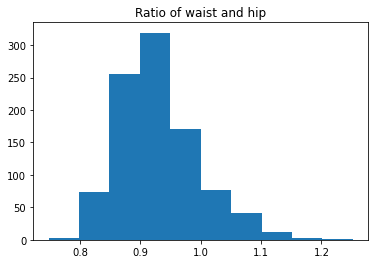

In [17]:
ratio=result[chest]/result[hip]
plt.hist(ratio)
plt.title("Ratio of waist and hip")
  

  
plt.show()

In [18]:
def check_ratio(bust,hip):
    ratio=bust/hip
    
    if ratio >=0.95 and ratio<=1.05: #measurement is within 20% of each other
        return rectangle
    elif ratio<0.95:
        return triangle
    else:
        return inverted_triangle

In [19]:
# bust_hip=y[[chest,hip]]
# #loop through each row and check ratio
# bust_hip['shape']=bust_hip.apply(lambda row: check_ratio(row[chest],row[hip]),axis=1)
# #count number of each ratio
# bust_hip['shape'].value_counts()
# bust_hip.head()
# #cound number of each ratio
# bust_hip['shape'].value_counts()
#  body_shape(bust,hip,waist,shoulder):
data=result[[chest,hip,waist,shoulder_breadth]]
# data.head()
data['shape']=data.apply(lambda row: body_shape(row[chest],row[hip],row[waist],row[shoulder_breadth]),axis=1)


data['shape'].value_counts() 





/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_56775/1948958947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shape']=data.apply(lambda row: body_shape(row[chest],row[hip],row[waist],row[shoulder_breadth]),axis=1)


Rectangle            437
Hourglass            314
Triangle             115
Inverted Triangle     17
Name: shape, dtype: int64

In [20]:
from base64 import encode


encoder=preprocessing.OneHotEncoder().fit_transform(data['shape'].values.reshape(-1,1)).toarray()
#convert list to dataframe
# print(encoder)
data[hourglass]=encoder[:,0] 
data[inverted_triangle]=encoder[:,1]
data[rectangle]=encoder[:,2]
data[triangle]=encoder[:,3]
# encoder=pd.DataFrame(encoder)
# #rename columns
# encoder.columns=[inverted_triangle,rectangle]
# #merge with chest_waist dataframe
# chest_waist=chest_waist.merge(encoder)
data.head()


/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_56775/4116643642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[hourglass]=encoder[:,0]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_56775/4116643642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[inverted_triangle]=encoder[:,1]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_56775/4116643642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Chest Circumference (mm),"Hip Circumference, Maximum (mm)","Waist Circumference, Pref (mm)",Shoulder Breadth (mm),shape,Hourglass,Inverted Triangle,Rectangle,Triangle
0,904.0,1000.0,724.0,406.0,Hourglass,1.0,0.0,0.0,0.0
2,1092.0,1135.0,1014.0,460.0,Rectangle,0.0,0.0,1.0,0.0
3,898.0,985.0,755.0,432.0,Rectangle,0.0,0.0,1.0,0.0
4,925.0,1052.0,901.0,388.0,Triangle,0.0,0.0,0.0,1.0
5,1080.0,1122.0,906.0,483.0,Rectangle,0.0,0.0,1.0,0.0


In [21]:
data=data.drop(chest,axis=1)
data=data.drop(waist,axis=1)
data=data.drop(shoulder_breadth,axis=1)
data=data.drop(hip,axis=1)
data.head()

,shape,Hourglass,Inverted Triangle,Rectangle,Triangle
0,Hourglass,1.0,0.0,0.0,0.0
2,Rectangle,0.0,0.0,1.0,0.0
3,Rectangle,0.0,0.0,1.0,0.0
4,Triangle,0.0,0.0,0.0,1.0
5,Rectangle,0.0,0.0,1.0,0.0


In [22]:
from turtle import shape


result=pd.concat([result,data],axis=1,join='inner')


features.append('shape')
features.append(hourglass)
features.append(inverted_triangle)
features.append(rectangle)
features.append(triangle)
features.append(meausred_weight)

target = features[-feature_size:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-feature_size]
# print(result.shape)

result.dropna(axis=0,how='any',inplace=True)
# print(result.shape)
# #Train and test
X = result[features]
y = result[target]



In [25]:
print(target)

['shape', 'Hourglass', 'Inverted Triangle', 'Rectangle', 'Triangle', 'shape', 'Hourglass', 'Inverted Triangle', 'Rectangle', 'Triangle', 'Weight (kg)']


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
#Train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20)

additional_df=pd.concat([X_test[subject_number],X_test['shape']],axis=1)
X_test=X_test.drop(subject_number,axis=1)


X_val=X_val.drop(subject_number,axis=1)




KeyError: 'Subject Number'

In [ ]:
X_train.to_csv("./female/X_train.csv",encoding='utf-8',index=False)
y_train.to_csv("./female/y_train.csv",encoding='utf-8',index=False)

X_test.to_csv("./female/X_test.csv",encoding='utf-8',index=False)
y_test.to_csv("./female/y_test.csv",encoding='utf-8',index=False)

X_val.to_csv("./female/X_val.csv",encoding='utf-8',index=False)
y_val.to_csv("./female/y_val.csv",encoding='utf-8',index=False)

additional_df.to_csv("./female/additional_df.csv",encoding='utf-8',index=False)


In [ ]:
y_test.head()

,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
265,983.0,1062.0,883.0,469.0,1063.0,827.0,617.0,482.0,1079.0,626.0,1020.0,87.5,67.19,87.55
72,825.0,986.0,832.0,466.0,1091.0,767.0,644.0,413.0,1040.0,611.0,924.0,76.0,80.00,84.00
384,1051.0,1170.0,947.0,468.0,1054.0,767.0,607.0,466.0,1036.0,618.0,1055.0,81.2,68.00,81.00
193,928.0,1100.0,845.0,494.0,1050.0,731.0,591.0,409.0,1013.0,579.0,962.0,76.9,68.47,78.43
61,720.0,889.0,746.0,470.0,1011.0,808.0,593.0,405.0,1052.0,590.0,862.0,62.0,62.00,74.00


In [ ]:
print(additional_df)

     Subject Number              shape
265           15418          Rectangle
72             4163          Hourglass
384            4793  Inverted Triangle
193           15239          Rectangle
61             4139          Hourglass
..              ...                ...
238           15362          Hourglass
541           16301          Rectangle
10            11042          Rectangle
596           16552          Hourglass
502           16047          Hourglass

[177 rows x 2 columns]
